In [98]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns

%matplotlib inline
import warnings
warnings.simplefilter("ignore")

In [6]:
dataset_temp=pd.read_csv('C:/Games/Test/faults.csv') 
data = dataset_temp.iloc[:,:27]
data.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000


Посмотрим частотный график данных колонок (график histograms):

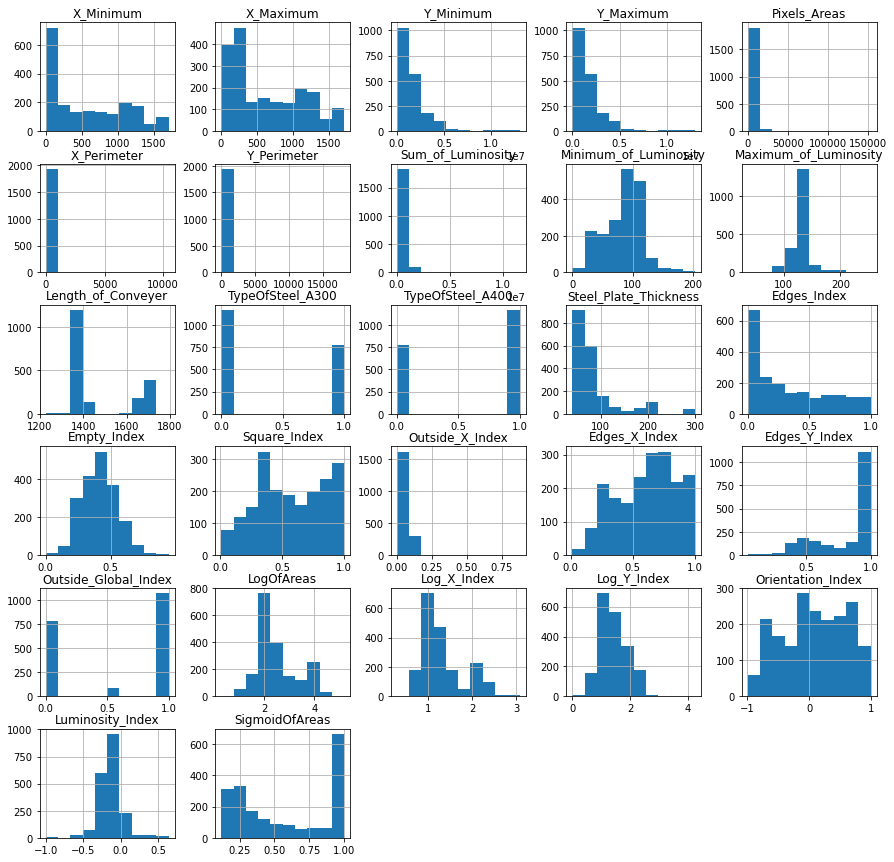

In [7]:
data.hist(figsize=(15,15))
plt.show()

Из данных графиков можно увидеть, что Outside_Global_Index, TypeOfSteel_A300, TypeOfSteel_A400 являются дискретными величинами со значениями [0, 0.5, 1], [0,1], [0,1] соответственно (распределение Бернулли).

Можно также заметить, что такие переменные, как Empty_Index, Log_Y_Index, Luminosity_Index являются нормальным распределением Гаусса.

Выделим колонки в отдельный список

In [8]:
headers = list(data.columns.values)

Нормализуем параметры

In [10]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(data)
df_norm = pd.DataFrame(np_scaled)
df_norm.columns = headers
df_norm.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,-0.950733,-0.946167,-0.959296,-0.959291,-0.996528,-0.997128,-0.995262,-0.995864,-0.251232,-0.342593,...,-0.992681,-0.074269,1.000000,1.0,-0.129375,-0.565757,-0.228168,0.824986,-0.137599,0.051532
1,-0.243402,-0.242832,-0.609987,-0.609985,-0.998611,-0.998468,-0.996805,-0.998077,-0.172414,-0.203704,...,-0.995197,0.188312,0.930013,1.0,-0.290393,-0.655836,-0.313218,0.799667,0.003413,-0.592736
2,-0.027566,-0.027501,-0.761620,-0.761619,-0.999096,-0.998851,-0.998017,-0.998668,-0.024631,-0.185185,...,-0.994968,0.492695,0.889449,1.0,-0.364982,-0.655836,-0.410477,0.672164,0.067764,-0.782066
3,0.000587,0.001755,-0.944125,-0.944120,-0.997720,-0.997894,-0.995152,-0.996765,-0.024631,-0.175926,...,-0.991537,0.063515,1.000000,1.0,-0.203514,-0.607587,-0.223613,0.851415,0.026325,-0.086947
4,0.512023,0.523698,-0.924294,-0.924257,-0.968464,-0.988896,-0.971462,-0.957437,-0.635468,-0.175926,...,-0.974611,-0.454343,0.975830,1.0,0.261925,-0.329631,0.131754,0.941595,-0.025350,1.000000


Построим матрицу корреляций:

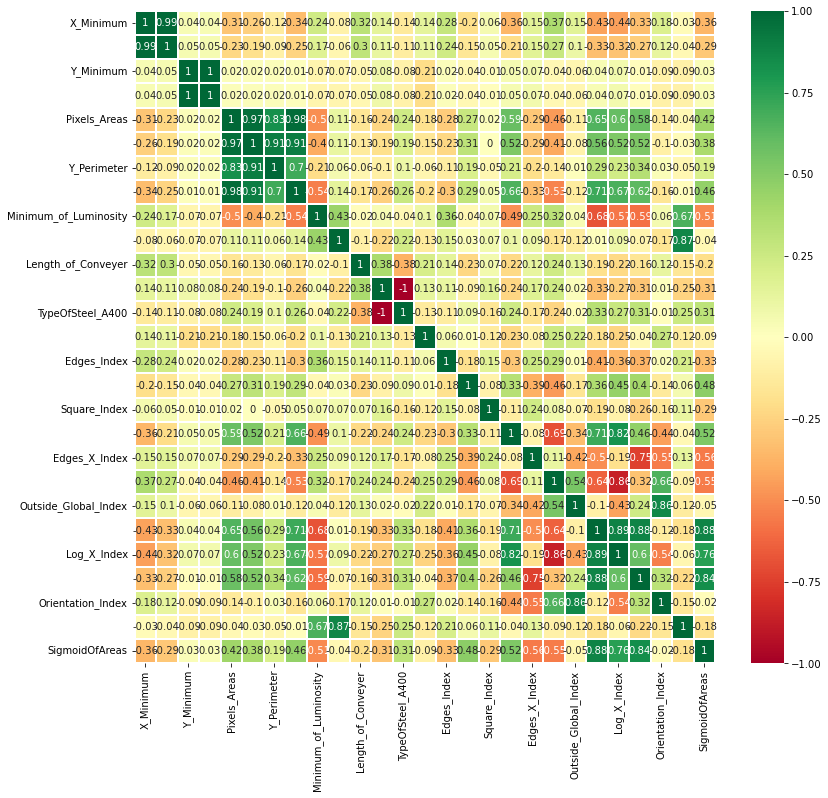

In [11]:
correlation_matrix = df_norm.corr(method ='pearson').round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(13,12)
plt.show()

Некоторые переменные сильно коррелированы (например, Sum_of_Luminosity и Pixels_areas)

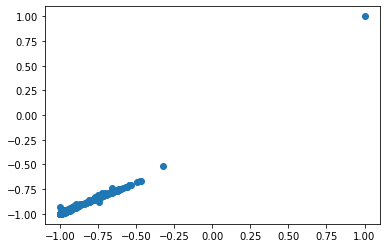

In [12]:
plt.scatter(df_norm['Sum_of_Luminosity'], df_norm['Pixels_Areas'])
plt.show()

Корреляция Пирсона

In [13]:
from scipy.stats import pearsonr
pearsonr(df_norm['Sum_of_Luminosity'], df_norm['Pixels_Areas'])

(0.9789516167596555, 0.0)

Удалим из таблицы значения с корреляцией, большей чем 95%

In [17]:
corr_matrix = df_norm.corr().abs()

# Выбираем верхний треугольник матрицы
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)

df_norm = df_norm.drop(df_norm[to_drop], axis=1)
df_norm.head()

['X_Maximum', 'Y_Maximum', 'X_Perimeter', 'Sum_of_Luminosity', 'TypeOfSteel_A400']


C:\Users\rammi\AppData\Local\Temp/ipykernel_23060/1824166286.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,X_Minimum,Y_Minimum,Pixels_Areas,Y_Perimeter,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,Steel_Plate_Thickness,Edges_Index,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,-0.950733,-0.959296,-0.996528,-0.995262,-0.251232,-0.342593,0.622575,1.0,-0.692308,-0.899920,...,-0.992681,-0.074269,1.000000,1.0,-0.129375,-0.565757,-0.228168,0.824986,-0.137599,0.051532
1,-0.243402,-0.609987,-0.998611,-0.996805,-0.172414,-0.203704,0.622575,1.0,-0.692308,0.536777,...,-0.995197,0.188312,0.930013,1.0,-0.290393,-0.655836,-0.313218,0.799667,0.003413,-0.592736
2,-0.027566,-0.761620,-0.999096,-0.998017,-0.024631,-0.185185,0.396825,1.0,-0.538462,0.951367,...,-0.994968,0.492695,0.889449,1.0,-0.364982,-0.655836,-0.410477,0.672164,0.067764,-0.782066
3,0.000587,-0.944125,-0.997720,-0.995152,-0.024631,-0.175926,-0.555556,-1.0,0.923077,0.464429,...,-0.991537,0.063515,1.000000,1.0,-0.203514,-0.607587,-0.223613,0.851415,0.026325,-0.086947
4,0.512023,-0.924294,-0.968464,-0.971462,-0.635468,-0.175926,-0.555556,-1.0,0.115385,-0.860330,...,-0.974611,-0.454343,0.975830,1.0,0.261925,-0.329631,0.131754,0.941595,-0.025350,1.000000


# Датасет Titanic challenge

Тренировочные данные для построения модели. Для тренировочных данных есть показатель класса для каждого пассажира. Модель будет базироваться на таких значениях как пол пассажира и класс. 

Тестовые данные нужны чтобы посмотреть насколько хорошо модель обучена на тренировочных данных. Для тестовых данных нет показателя класса. Найдем класс для каждого пассажира. 

In [27]:
data=pd.read_csv('C:/Games/Test/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Начертим график плотности распределения величин. 

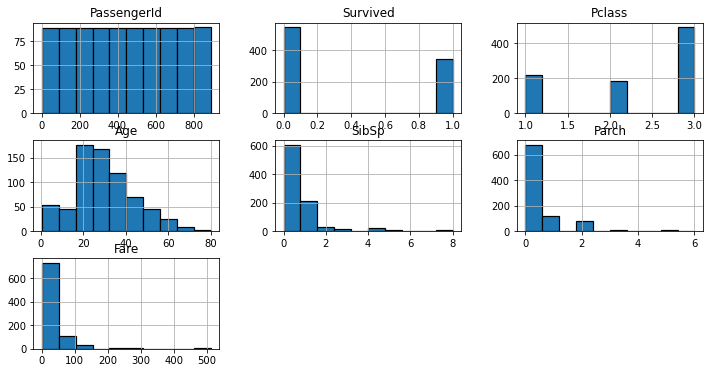

In [28]:
data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

На графике плотностей распределения четко видны такие распределения, как

Биноминальное распределение ('Survived')<br>
Равномерное распределение ('PassengerId')<br>
Нормальное ('Age')<br>
Логнормальное ('SibSp', 'Fare')<br>

Посмотрим отсутствующие данные:

C:\Games\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


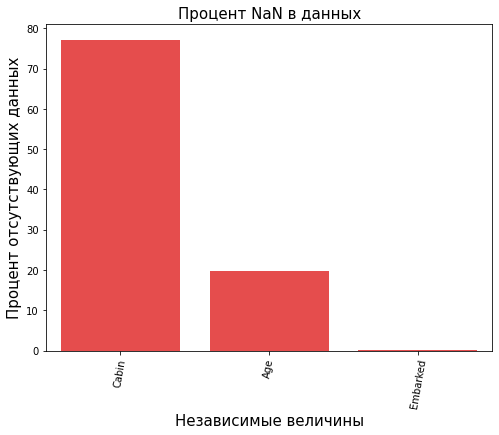

In [29]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending = False)
    ms = pd.concat([total, percent], axis = 1, keys=['Total', 'Percent'])
    ms = ms[ms["Percent"] > 0]
    f,ax = plt.subplots(figsize = (8,6))
    plt.xticks(rotation = '80')
    fig = sns.barplot(ms.index, ms["Percent"], color = "red", alpha = 0.8)
    plt.xlabel('Независимые величины', fontsize = 15)
    plt.ylabel('Процент отсутствующих данных', fontsize = 15)
    plt.title('Процент NaN в данных', fontsize = 15)
    return ms

missingdata(data)

Можем сразу посмотреть, отсутствуют ли в тестовых данных те же самые величины.

In [30]:
test = pd.read_csv('C:/Games/Test/titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


C:\Games\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Total,Percent
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


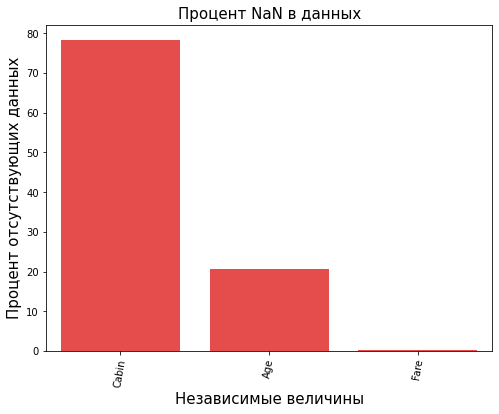

In [31]:
missingdata(test)

Избавимся от выбросов. 

Во-первых, посмотрим график встречаемости переменной 'Age':

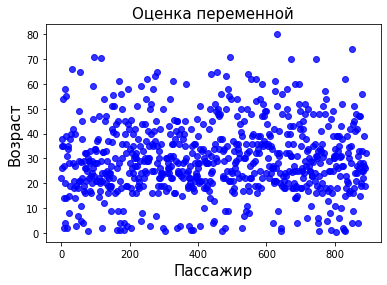

In [32]:
fig=plt.scatter(data.index, data["Age"], color = "blue" ,alpha = 0.8)
plt.xlabel('Пассажир', fontsize = 15)
plt.ylabel('Возраст', fontsize = 15)
plt.title('Оценка переменной', fontsize = 15)
plt.show()

Как вариант, можно заполнить неизвестные данные по правилу медианного фильтра: вместо Nan можно использовать среднее значение (не всегда работает).

In [33]:
test['Age'].fillna(test['Age'].median(), inplace = True)
data['Age'].fillna(data['Age'].median(), inplace = True)

In [34]:
test['Fare'].fillna(test['Fare'].median(), inplace = True)
drop_column = ['Cabin']
data.drop(drop_column, axis=1, inplace = True)
test.drop(drop_column,axis=1,inplace=True)

Значение Embarked есть отсутствующие значения в таблице тренировочных данных, но нет в тестовых, поэтому в случае с тестовыми данными мы можем например использовать наиболее встречаемое значение в качестве заполнения неизвестных 

In [35]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

Проверим, имеются ли отсутствующие значения в данных

In [37]:
print('train data:')
print(data.isnull().sum())
print('test data:')
print(test.isnull().sum())

train data:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
test data:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [38]:
all_data=[data,test]

In [43]:
# Создаем новое значение FamilySize как комбинацию SibSp и Parch
for dataset in all_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
for dataset in all_data:
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0, 12, 20, 40, 120], labels = ['Children', 'Teenage', 
                                                                                     'Adult', 'Elder'])

for dataset in all_data:
    dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins=[0, 7.5, 15, 30, 120], labels=['Low_fare', 'median_fare',
                                                                                      'Average_fare', 'high_fare'])

In [44]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Age_bin,Fare_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Adult,Low_fare
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Adult,high_fare
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Adult,median_fare
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,Adult,high_fare
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Adult,median_fare


Мы можем удалить такие значения как Name и Ticket, так как они не несут смысловой информации

In [47]:
drop_column = ['Name','Ticket']
data.drop(drop_column, axis=1, inplace = True)

In [49]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Age_bin,Fare_bin
0,1,0,3,male,22.0,1,0,7.2500,S,2,Adult,Low_fare
1,2,1,1,female,38.0,1,0,71.2833,C,2,Adult,high_fare
2,3,1,3,female,26.0,0,0,7.9250,S,1,Adult,median_fare
3,4,1,1,female,35.0,1,0,53.1000,S,2,Adult,high_fare
4,5,0,3,male,35.0,0,0,8.0500,S,1,Adult,median_fare


Так как у нас получилось много данных категорийных, мы можем заменить эти колонки на вектора (one-hot encoding), таким образом легче для сравнения этих значений

In [51]:
data_new = pd.get_dummies(data, columns = ["Sex", "Age_bin", "Embarked", "Fare_bin"],
                             prefix=["Sex", "Age_bin", "Embarked", "Fare_bin"])

test_new = pd.get_dummies(test, columns = ["Sex", "Age_bin", "Embarked", "Fare_bin"],
                             prefix=["Sex", "Age_bin", "Embarked", "Fare_bin"])

data_new.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'FamilySize', 'Sex_female', 'Sex_male', 'Age_bin_Children',
       'Age_bin_Teenage', 'Age_bin_Adult', 'Age_bin_Elder', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Fare_bin_Low_fare', 'Fare_bin_median_fare',
       'Fare_bin_Average_fare', 'Fare_bin_high_fare'],
      dtype='object')

In [53]:
data_new.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_female,Sex_male,...,Age_bin_Teenage,Age_bin_Adult,Age_bin_Elder,Embarked_C,Embarked_Q,Embarked_S,Fare_bin_Low_fare,Fare_bin_median_fare,Fare_bin_Average_fare,Fare_bin_high_fare
0,1,0,3,22.0,1,0,7.2500,2,0,1,...,0,1,0,0,0,1,1,0,0,0
1,2,1,1,38.0,1,0,71.2833,2,1,0,...,0,1,0,1,0,0,0,0,0,1
2,3,1,3,26.0,0,0,7.9250,1,1,0,...,0,1,0,0,0,1,0,1,0,0
3,4,1,1,35.0,1,0,53.1000,2,1,0,...,0,1,0,0,0,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1,...,0,1,0,0,0,1,0,1,0,0


Исключим переменные, не несущие никакой информации (сильно кореллированы с другими переменными). Нарисуем матрицу теплоты для того, чтобы показать корелляцию между переменными

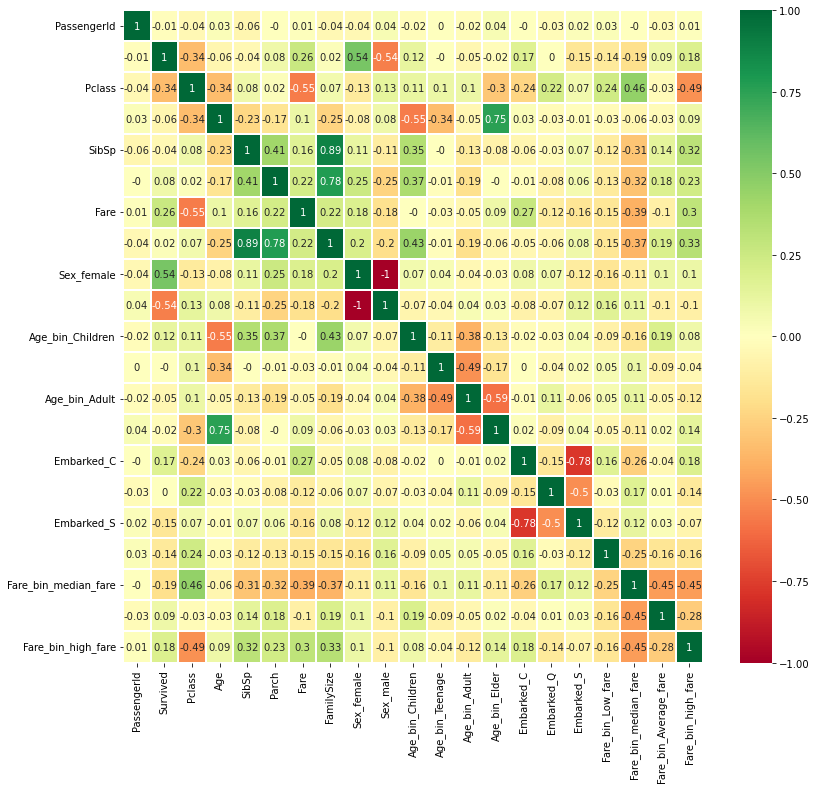

In [59]:
correlation_matrix = data_new.corr(method = 'pearson').round(2)
# annot = True чтобы печатать значение внутри ячейки матрицы
sns.heatmap(data=correlation_matrix, annot = True, cmap = 'RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(13, 12)
plt.show()

In [ ]:
Объединим  переменные, которые имеют корелляцию больше чем 70% (красные и зеленые ячейки)

In [60]:
corr_matrix = data_new.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
print(to_drop)

data_new = data_new.drop(data_new[to_drop], axis=1)
test_new = test_new.drop(test_new[to_drop], axis=1)

['FamilySize', 'Sex_male', 'Age_bin_Elder', 'Embarked_S']


C:\Users\rammi\AppData\Local\Temp/ipykernel_23060/990552466.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))


In [61]:
data_new.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Age_bin_Children,Age_bin_Teenage,Age_bin_Adult,Embarked_C,Embarked_Q,Fare_bin_Low_fare,Fare_bin_median_fare,Fare_bin_Average_fare,Fare_bin_high_fare
0,1,0,3,22.0,1,0,7.2500,0,0,0,1,0,0,1,0,0,0
1,2,1,1,38.0,1,0,71.2833,1,0,0,1,1,0,0,0,0,1
2,3,1,3,26.0,0,0,7.9250,1,0,0,1,0,0,0,1,0,0
3,4,1,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,1,0,0,0,1,0,0


Пронормируем данные

In [62]:
data_new[['Age','Fare']] = data_new[['Age', "Fare"]].apply(pd.to_numeric)
test_new[['Age','Fare']] = test_new[['Age', "Fare"]].apply(pd.to_numeric)

In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_new[['Age','Fare']] = scaler.fit_transform(data_new[['Age', 'Fare']])
test_new[['Age','Fare']] = scaler.fit_transform(test_new[['Age', 'Fare']])

In [67]:
drop_column = ['PassengerId']
data_new.drop(drop_column, axis=1, inplace = True)
train_X = data_new.drop("Survived", axis=1)#колонка Survived идет в новую переменную - Y output
train_Y = data_new["Survived"]
test_X  = test_new.drop("PassengerId", axis=1).copy() 

In [68]:
train_X.shape, train_Y.shape, test_X.shape

((891, 15), (891,), (418, 15))

# Линейная регрессия для датасета "Цены на бостонские дома"

In [89]:
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv('C:/Games/Test/housing.csv', delim_whitespace = True, names = names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Посмотрим выбросы в данных с помощью boxplot

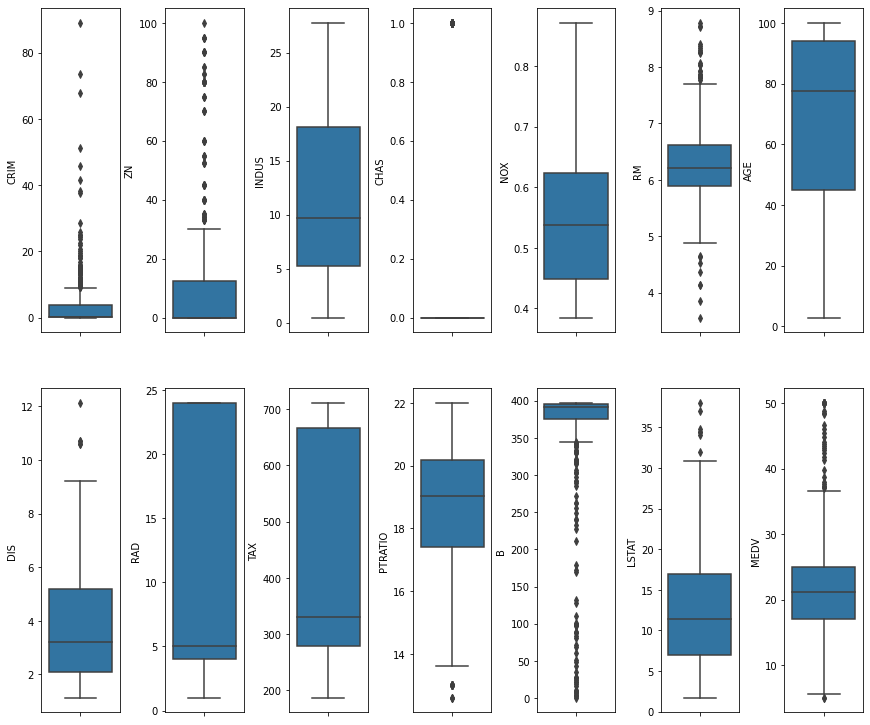

In [90]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(12, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y = k, data = data, ax = axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

Можно заметить, что такие значения как CRIM, ZN, RM, B имеют выбросы.

Посмотрим процент выбросов в данных

In [92]:
for k, v in data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] / np.shape(data)[0] * 100.0
    print("Выбросы колонки %s = %.2f%%" % (k, perc))
    

Выбросы колонки CRIM = 13.04%
Выбросы колонки ZN = 13.44%
Выбросы колонки INDUS = 0.00%
Выбросы колонки CHAS = 100.00%
Выбросы колонки NOX = 0.00%
Выбросы колонки RM = 5.93%
Выбросы колонки AGE = 0.00%
Выбросы колонки DIS = 0.99%
Выбросы колонки RAD = 0.00%
Выбросы колонки TAX = 0.00%
Выбросы колонки PTRATIO = 2.96%
Выбросы колонки B = 15.22%
Выбросы колонки LSTAT = 1.38%
Выбросы колонки MEDV = 7.91%


Так как максимальное значение переменной MEDV = 50, удалим данные, не влияющие на предсказание цен выше 50

In [93]:
print(np.shape(data))
data = data[~(data['MEDV'] >= 50.0)]
print(np.shape(data))

(506, 14)
(490, 14)


Посмотрим плотности распределения значений

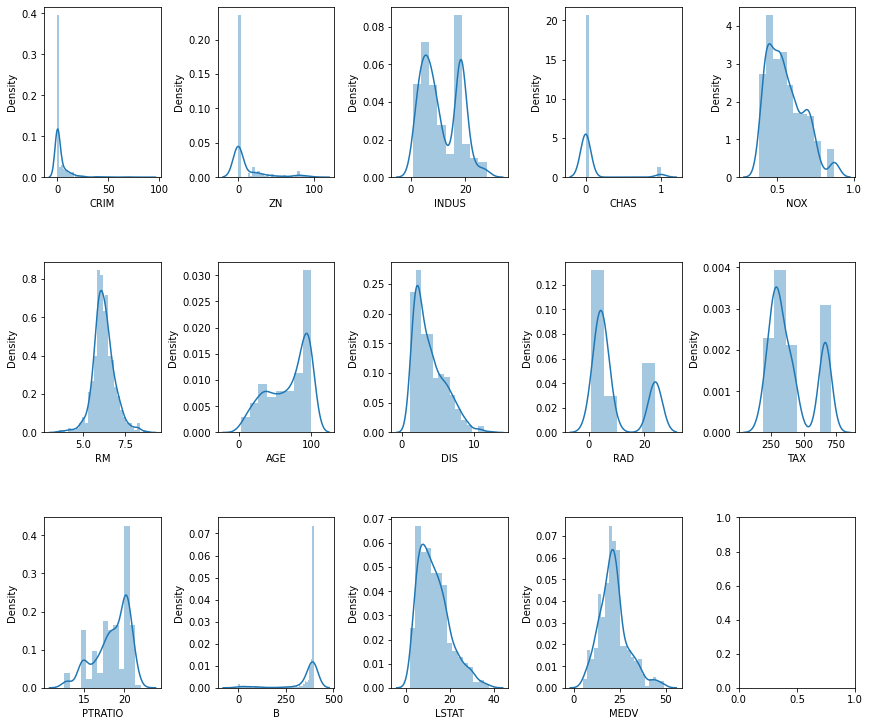

In [99]:
fig, axs = plt.subplots(ncols = 5, nrows = 3, figsize = (12, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.distplot(v, ax = axs[index])
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)
plt.show()

Такие переменные, как CRIM, ZN, B имеют перекошенное распределение. MEDV похоже на нормальное распределение. Другие переменные имеют либо нормальное либо биноминальное распределение, кроме CHAS (дискретная переменная).

Построим график плотности распределения колонки 'MEDV'

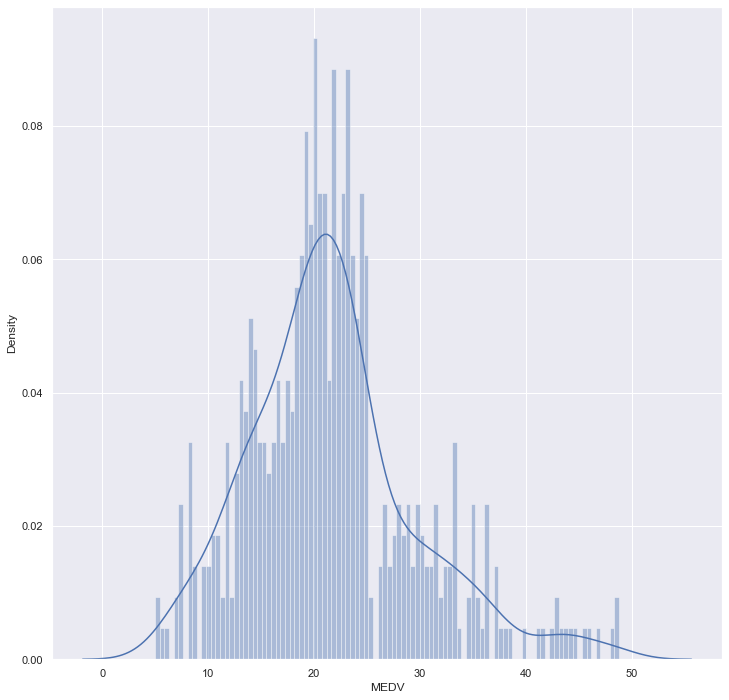

In [103]:
sns.set(rc={'figure.figsize': (12,12)})
sns.distplot(data['MEDV'], bins = 100)
plt.show()

Можно заметить, что данные представляют собой нормальное распределение с некоторыми выбросами

Построим матрицу корелляций

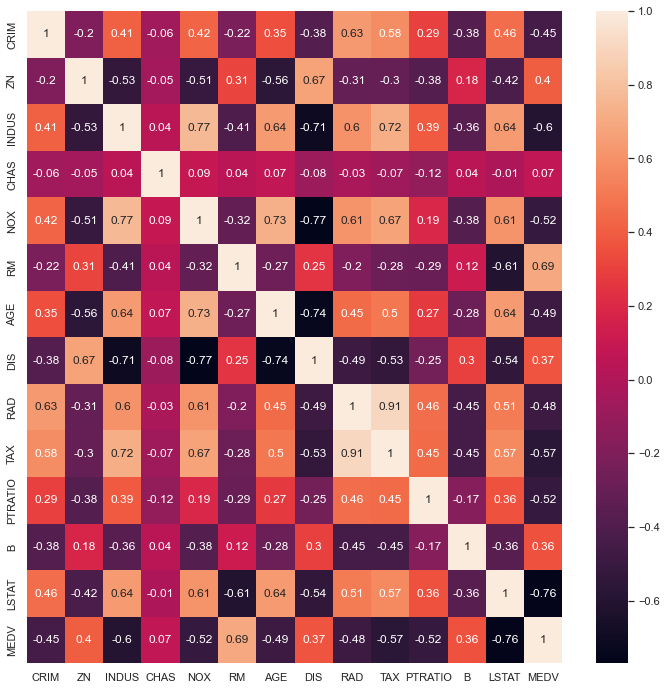

In [104]:
correlation_matrix = data.corr(method = 'pearson').round(2)
# annot = True чтобы печатать значение внутри ячейки матрицы
sns.heatmap(data=correlation_matrix, annot = True)
plt.show()

In [105]:
print(sorted(correlation_matrix['MEDV']))

[-0.76, -0.6, -0.57, -0.52, -0.52, -0.49, -0.48, -0.45, 0.07, 0.36, 0.37, 0.4, 0.69, 1.0]


Наша задача - предсказать значение MEDV - средняя цена дома. Чтобы понять, какие переменные влияют на цену дома, посмотрим на корелляцию с данным значением. По сути, нам из таблицы нужны только те переменные, которые кореллируют (положительно или отрицательно) с искомым значением (MEDV). Можно увидеть, что RM имеет положительно высокую корелляцию с MEDV 0.7, вторая величина по корелляции - LTSAT (-0.74). 


*   Надо также проверять переменные на мультиколлинеарность: не стоит выбирать в качестве данных значения с высокой корелляцией. Например, следующими по величине абсолютной корелляции идут значения PTRATIO, INDUS, TAX. Мы можем их всех выбрать в качестве значимых данных, но TAX и INDUS между собой имеют корелляцию 72%, поэтому имеет смысл выбрать одну из них.  


Построим корелляцию  LSTAT, INDUS, RM, TAX, NOX, PTRAIO с MEDV, так как их абсолютное значение корелляции с MEDV более 50%

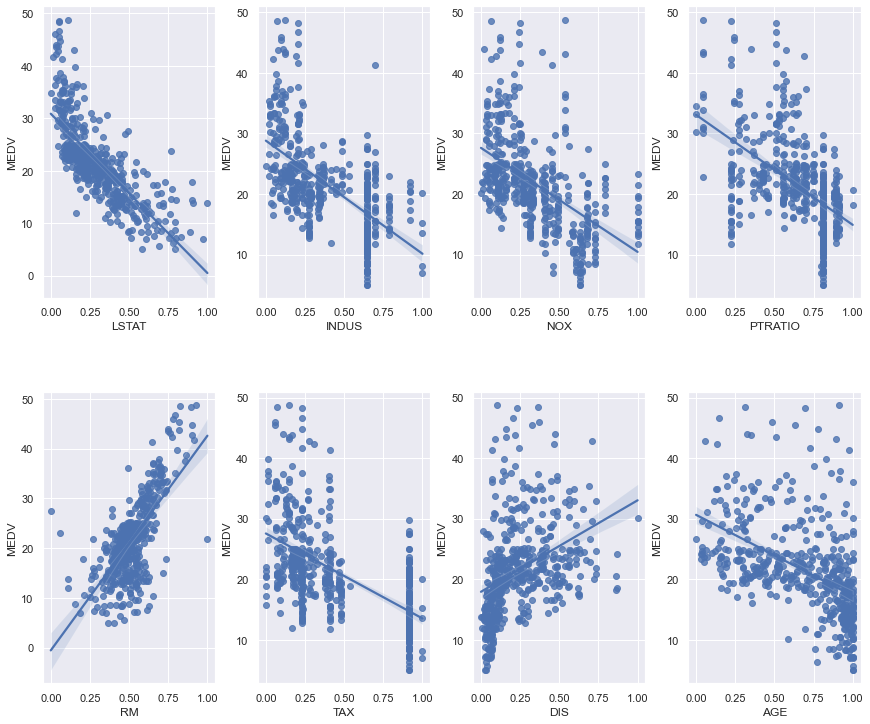

In [106]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:, column_sels]
y = data['MEDV']
x = pd.DataFrame(data = min_max_scaler.fit_transform(x), columns = column_sels)
fig, axs = plt.subplots(ncols = 4, nrows = 2, figsize = (12, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y = y, x = x[k], ax = axs[i])
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

Наблюдения:

*   Линейная зависимость от переменной RM. Есть выбросы
*   Цена уменьшается, если увеличивается значение LSTAT. 
*   Цена увеличивается, если увеличивается RAD, особенно хорошо заметно в среднем значении, но не линейная зависимость, есть выбросы
*   Цена увеличивается, если увеличивается TAX, нелинейная зависимость, есть выбросы



Подводя итоги, мы можем выбрать для предсказания переменной MEDV такие значения, как 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE'. 

Перекошенность данных можно убрать с помощью логарифмических преобразований

In [107]:
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

In [108]:
from sklearn.linear_model import LinearRegression
lstat = x['LSTAT']
medv = data['MEDV']
model = LinearRegression()
result = model.fit(np.array(lstat).reshape(-1, 1), medv)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 32.49330636655473
slope: [-42.61078059]


Линейная регрессия от одной переменной

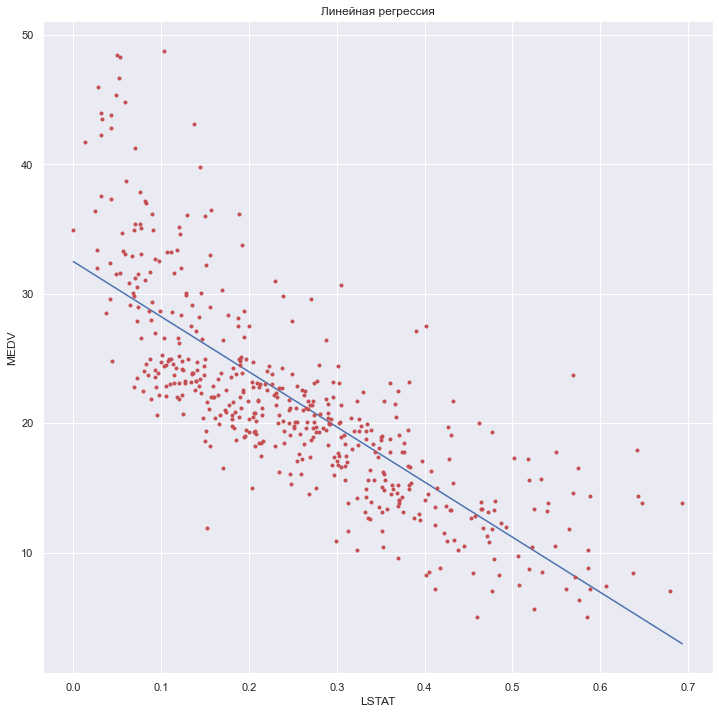

In [111]:
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Линейная регрессия')
x = np.linspace(min(lstat), max(lstat), 100)
y = model.coef_ * x + model.intercept_
plt.plot(x, y)
plt.plot(lstat, medv, 'r.')
plt.show()

In [113]:
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
lstat = x['LSTAT']
indus = x['INDUS']
nox = x['NOX']
ptratio = x['PTRATIO']
rm = x['RM']
tax = x['TAX']
dis = x['DIS']
age = x['AGE']

y = data['MEDV']
x = np.vstack([np.array(lstat), np.array(indus), np.array(nox), 
               np.array(ptratio), np.array(rm), np.array(tax), 
              np.array(dis), np.array(age)]).T
print('x - это многомерная матрица,: ')
print(x[:3])
model = LinearRegression().fit(x, y)

x - это многомерная матрица,: 
[[  4.98     2.31     0.538   15.3      6.575  296.       4.09    65.2   ]
 [  9.14     7.07     0.469   17.8      6.421  242.       4.9671  78.9   ]
 [  4.03     7.07     0.469   17.8      7.185  242.       4.9671  61.1   ]]


In [114]:
print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 32.04698853519186
slope: [-3.81813356e-01 -9.23073341e-02 -1.11558716e+01 -8.47024012e-01
  4.01294870e+00 -4.97862424e-03 -9.88571701e-01 -2.66668683e-02]


In [115]:
print('Предсказание модели: ', model.predict(x[0:2]))

Предсказание модели:  [30.10052866 25.14343657]
